In [1]:
import pandas as fluff
import csv

song_parts = fluff.read_csv('songs_parts.csv',sep=',', encoding = "ISO-8859-1")

with open('song_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            an_chorus = song_parts.loc[i, 'chorus']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,an_chorus])
        except Exception as e:
            print(e)
            
with open('song_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            verse = song_parts.loc[i, 'verse']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,verse])
        except Exception as e:
            print(e)



In [4]:
import pandas as pd
import csv
song_verse = pd.read_csv('song_verse.csv',error_bad_lines=False)
song_chorus = pd.read_csv('song_chorus.csv',error_bad_lines=False)
audio_features = pd.read_csv('audio_features.csv',error_bad_lines=False)
merged = pd.merge(audio_features,song_verse, how='left', on='Song Title')
merged = pd.merge(merged,song_chorus, how='left', on='Song Title')
merged.to_csv('merged.csv', index=False)


In [5]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.chorus


natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_chorus = sp.loc[i, 'chorus']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_chorus,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            


{'emotion': {'sadness': 0.183425, 'joy': 0.773032, 'fear': 0.035934, 'disgust': 0.001244, 'anger': 0.014387}}
{'emotion': {'sadness': 0.132957, 'joy': 0.572446, 'fear': 0.377735, 'disgust': 0.002654, 'anger': 0.008717}}
{'emotion': {'sadness': 0.153447, 'joy': 0.328575, 'fear': 0.140589, 'disgust': 0.071614, 'anger': 0.12738}}
{'emotion': {'sadness': 0.548347, 'joy': 0.205348, 'fear': 0.044473, 'disgust': 0.097251, 'anger': 0.248512}}
{'emotion': {'sadness': 0.63191, 'joy': 0.012463, 'fear': 0.280514, 'disgust': 0.090544, 'anger': 0.252588}}
{'emotion': {'sadness': 0.108436, 'joy': 0.730176, 'fear': 0.068314, 'disgust': 0.037594, 'anger': 0.053366}}
{'emotion': {'sadness': 0.154045, 'joy': 0.209924, 'fear': 0.163634, 'disgust': 0.066356, 'anger': 0.120948}}
{'emotion': {'sadness': 0.609175, 'joy': 0.064401, 'fear': 0.069821, 'disgust': 0.168463, 'anger': 0.356413}}
{'emotion': {'sadness': 0.693173, 'joy': 0.022259, 'fear': 0.147759, 'disgust': 0.086962, 'anger': 0.364451}}
{'emotion': 

{'emotion': {'sadness': 0.209123, 'joy': 0.24983, 'fear': 0.576325, 'disgust': 0.021309, 'anger': 0.068941}}
{'emotion': {'sadness': 0.742598, 'joy': 0.013113, 'fear': 0.132119, 'disgust': 0.092184, 'anger': 0.321946}}
{'emotion': {'sadness': 0.540427, 'joy': 0.583269, 'fear': 0.172316, 'disgust': 0.107033, 'anger': 0.118476}}
{'emotion': {'sadness': 0.476197, 'joy': 0.223784, 'fear': 0.214965, 'disgust': 0.052506, 'anger': 0.107518}}
{'emotion': {'sadness': 0.267307, 'joy': 0.02988, 'fear': 0.100417, 'disgust': 0.010541, 'anger': 0.033069}}
{'emotion': {'sadness': 0.061936, 'joy': 0.104017, 'fear': 0.060835, 'disgust': 0.009525, 'anger': 0.045088}}
{'emotion': {'sadness': 0.720894, 'joy': 0.074478, 'fear': 0.210179, 'disgust': 0.128074, 'anger': 0.103155}}
{'emotion': {'sadness': 0.014814, 'joy': 0.567268, 'fear': 0.013416, 'disgust': 0.009428, 'anger': 0.024065}}
{'emotion': {'sadness': 0.097787, 'joy': 0.071019, 'fear': 0.13505, 'disgust': 0.468633, 'anger': 0.190046}}
{'emotion': {

{'emotion': {'sadness': 0.39094, 'joy': 0.504746, 'fear': 0.124454, 'disgust': 0.008171, 'anger': 0.061871}}
{'emotion': {'sadness': 0.095475, 'joy': 0.025074, 'fear': 0.08225, 'disgust': 0.459191, 'anger': 0.054818}}
{'emotion': {'sadness': 0.722164, 'joy': 0.008694, 'fear': 0.278267, 'disgust': 0.120152, 'anger': 0.202748}}
{'emotion': {'sadness': 0.481857, 'joy': 0.098255, 'fear': 0.109639, 'disgust': 0.067014, 'anger': 0.500851}}
{'emotion': {'sadness': 0.729459, 'joy': 0.175846, 'fear': 0.094251, 'disgust': 0.017878, 'anger': 0.05895}}
{'emotion': {'sadness': 0.239557, 'joy': 0.163917, 'fear': 0.304836, 'disgust': 0.202081, 'anger': 0.173261}}
{'emotion': {'sadness': 0.637931, 'joy': 0.022913, 'fear': 0.326318, 'disgust': 0.056625, 'anger': 0.272818}}
{'emotion': {'sadness': 0.394882, 'joy': 0.299906, 'fear': 0.072558, 'disgust': 0.127259, 'anger': 0.27965}}
{'emotion': {'sadness': 0.201531, 'joy': 0.529275, 'fear': 0.164457, 'disgust': 0.067845, 'anger': 0.107668}}
{'emotion': {'

In [6]:
ch = pd.read_csv('sentiment_chorus.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 72, 1: 85, 2: 21, 3: 10, 4: 22})

In [3]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.verse

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_verse = sp.loc[i, 'verse']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_verse,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            

{'emotion': {'sadness': 0.297842, 'joy': 0.643527, 'fear': 0.023434, 'disgust': 0.001863, 'anger': 0.058054}}
{'emotion': {'sadness': 0.403503, 'joy': 0.377848, 'fear': 0.154008, 'disgust': 0.15808, 'anger': 0.011867}}
{'emotion': {'sadness': 0.428785, 'joy': 0.416169, 'fear': 0.064478, 'disgust': 0.023707, 'anger': 0.171035}}
{'emotion': {'sadness': 0.061348, 'joy': 0.425657, 'fear': 0.467841, 'disgust': 0.13389, 'anger': 0.066499}}
{'emotion': {'sadness': 0.514236, 'joy': 0.050308, 'fear': 0.193708, 'disgust': 0.048115, 'anger': 0.143655}}
{'emotion': {'sadness': 0.486107, 'joy': 0.304272, 'fear': 0.234288, 'disgust': 0.021502, 'anger': 0.074984}}
{'emotion': {'sadness': 0.701646, 'joy': 0.062193, 'fear': 0.118404, 'disgust': 0.104477, 'anger': 0.240947}}
{'emotion': {'sadness': 0.515507, 'joy': 0.22886, 'fear': 0.133895, 'disgust': 0.168, 'anger': 0.118165}}
{'emotion': {'sadness': 0.210235, 'joy': 0.272624, 'fear': 0.149741, 'disgust': 0.153876, 'anger': 0.114252}}
{'emotion': {'sa

{'emotion': {'sadness': 0.065117, 'joy': 0.912893, 'fear': 0.012306, 'disgust': 0.002553, 'anger': 0.006147}}
{'emotion': {'sadness': 0.761584, 'joy': 0.011761, 'fear': 0.190084, 'disgust': 0.141059, 'anger': 0.20599}}
{'emotion': {'sadness': 0.743834, 'joy': 0.044061, 'fear': 0.274736, 'disgust': 0.063926, 'anger': 0.128341}}
{'emotion': {'sadness': 0.449842, 'joy': 0.302461, 'fear': 0.268298, 'disgust': 0.047476, 'anger': 0.081678}}
{'emotion': {'sadness': 0.602714, 'joy': 0.443604, 'fear': 0.734631, 'disgust': 0.076049, 'anger': 0.155717}}
{'emotion': {'sadness': 0.40222, 'joy': 0.155323, 'fear': 0.106365, 'disgust': 0.129934, 'anger': 0.430826}}
{'emotion': {'sadness': 0.779903, 'joy': 0.027967, 'fear': 0.323393, 'disgust': 0.053784, 'anger': 0.038872}}
{'emotion': {'sadness': 0.091363, 'joy': 0.584091, 'fear': 0.283291, 'disgust': 0.018138, 'anger': 0.009844}}
{'emotion': {'sadness': 0.111728, 'joy': 0.052887, 'fear': 0.313691, 'disgust': 0.475199, 'anger': 0.399097}}
{'emotion': 

{'emotion': {'sadness': 0.47012, 'joy': 0.455504, 'fear': 0.053662, 'disgust': 0.003529, 'anger': 0.091756}}
{'emotion': {'sadness': 0.184777, 'joy': 0.705497, 'fear': 0.049556, 'disgust': 0.016908, 'anger': 0.07537}}
{'emotion': {'sadness': 0.656801, 'joy': 0.042781, 'fear': 0.217052, 'disgust': 0.030587, 'anger': 0.334483}}
{'emotion': {'sadness': 0.296622, 'joy': 0.341396, 'fear': 0.111241, 'disgust': 0.219863, 'anger': 0.18903}}
{'emotion': {'sadness': 0.1544, 'joy': 0.64239, 'fear': 0.110089, 'disgust': 0.02365, 'anger': 0.114884}}
{'emotion': {'sadness': 0.506958, 'joy': 0.007341, 'fear': 0.555567, 'disgust': 0.070571, 'anger': 0.208263}}
{'emotion': {'sadness': 0.675372, 'joy': 0.117309, 'fear': 0.247215, 'disgust': 0.042176, 'anger': 0.152971}}
{'emotion': {'sadness': 0.322269, 'joy': 0.101365, 'fear': 0.19394, 'disgust': 0.284161, 'anger': 0.127133}}
{'emotion': {'sadness': 0.194958, 'joy': 0.693048, 'fear': 0.071702, 'disgust': 0.032273, 'anger': 0.040299}}
{'emotion': {'sadn

In [2]:

ch = pd.read_csv('sentiment_verse.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 93, 1: 73, 2: 16, 3: 6, 4: 24})

In [2]:
import pandas as pd
import csv

ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.Genre

from collections import Counter
Counter(arr)

Counter({1: 13,
         3: 45,
         4: 1,
         5: 1,
         6: 2,
         7: 1,
         8: 22,
         9: 9,
         10: 34,
         11: 3,
         12: 17,
         13: 4,
         14: 13,
         15: 5,
         16: 1,
         17: 4,
         18: 9,
         19: 13,
         20: 7,
         21: 2,
         22: 6})

In [3]:
#clustering 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[['Tempo','Loudness','Energy','Genre', 'sadness_verse','joy_verse', 'fear_verse','disgust_verse','anger_verse','sadness_chorus', 'joy_chorus','fear_chorus', 'disgust_chorus','anger_chorus']].as_matrix()

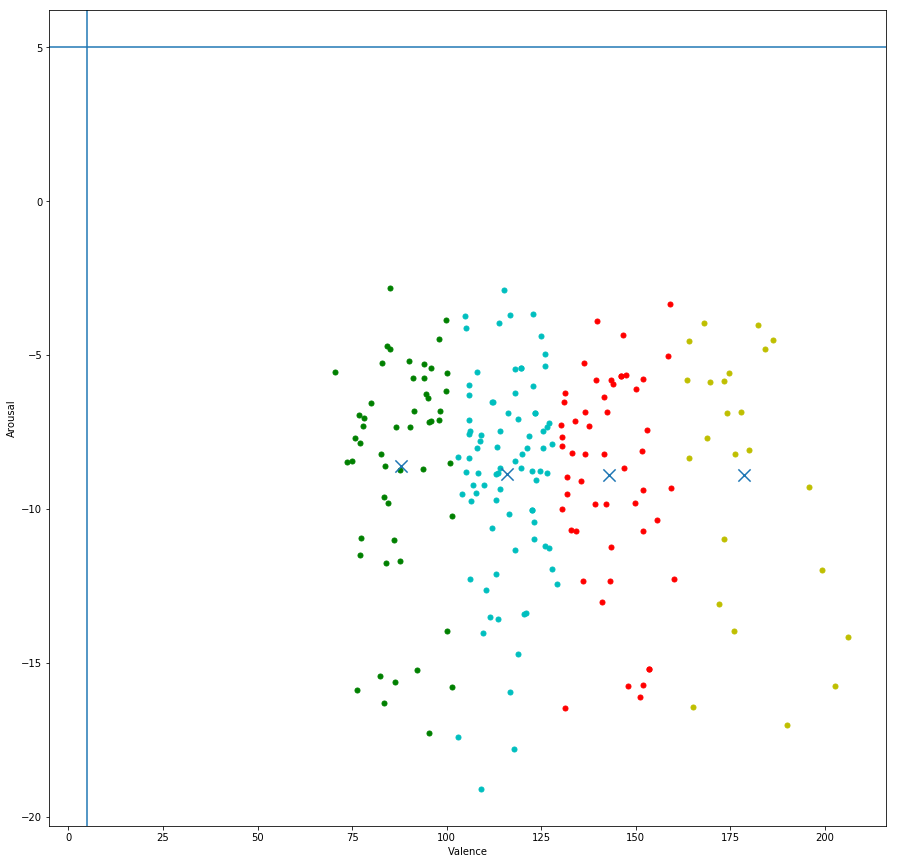

array([  1,   3,   4,   5,   7,   9,  15,  20,  21,  22,  25,  27,  30,
        38,  40,  41,  43,  44,  45,  47,  49,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  64,  65,  66,  69,  70,  73,  74,  75,
        79,  80,  82,  84,  86,  88,  92,  93,  98, 102, 105, 106, 107,
       108, 109, 110, 111, 117, 121, 122, 126, 129, 130, 135, 137, 139,
       140, 141, 144, 146, 147, 150, 154, 157, 175, 178, 183, 185, 186,
       188, 193, 197, 200, 201], dtype=int64)

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])


kmeans = KMeans(n_clusters=4)
kmeans.fit(X_lyrics)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y."]
plt.figure(figsize=(15,15))
plt.axvline(x=5)
plt.axhline(y=5)
for i in range(len(X_lyrics)):
    plt.plot(X_lyrics[i][0], X_lyrics[i][1],colors[int(labels[i])], markersize =10)

plt.xlabel("Valence")
plt.ylabel("Arousal")
#plt.grid(linestyle='-', linewidth=1)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

arr_ = ClusterIndicesNumpy(2, kmeans.labels_)

arr_

In [18]:
sp = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
for i in arr_:
    try:
        print(i)
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'sadness_verse'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
    except Exception as e:
        print(e)




1
Antonio Flores
Isla de Palma
5
3
Badfinger
Dennis
3
4
Badfinger
Just A Chance
3
5
Badfinger
Know One Knows
3
7
Badfinger
Three Time Loser
3
9
Billie Holiday
Gloomy Sunday
6
15
Chris Cornell
Higher Truth
8
20
Chris Cornell
Nearly Forgot My Broken Heart
8
21
Chris Cornell
Only These Words
8
22
Chris Cornell
Our Time In The Universe
8
25
Chris Cornell
Wrong Side
8
27
Donny Hathaway
Come Little Children
9
30
Donny Hathaway
Lord Help Me
9
38
Elliott Smith
King's Crossing
10
40
Elliott Smith
Little One
10
41
Elliott Smith
Memory Lane
10
43
Elliott Smith
Shooting Star
10
44
Elliott Smith
Strung Out Again
10
45
Elliott Smith
The Last Hour
10
47
Ephraim Lewis
Drowning in Your Eyes
11
49
Ephraim Lewis
Sad Song
11
52
Germs
Communist Eyes
12
53
Germs
Dragon Lady
12
54
Germs
Land of Treason
12
55
Germs
Let's Pretend
12
56
Germs
Lexicon Devil
12
57
Germs
Manimal
12
58
Germs
Media Blitz
12
59
Germs
Our Way
12
60
Germs
Richie Dagger's Crime
12
61
Germs
Shut Down
12
64
Germs
The Slave
12
65
Germs
We 